# Detailed Look Into Pharamaceutical Sales in India

## Obtaining the Data

In [85]:
#import dependencies

import os
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests

In [86]:
#read csv

df=pd.read_excel("./Business_dataset.xlsx")
df.head()

,Order ID,Generic Name,Brand Name,Company Name,Disease Medical Use,Invoice date,Company code,ship to country,Sold-to party Country Full Name,Delivery Plant,External Agent,Sales quantity,Price TC /Kg,Revenue,External commissions,Months
0,FY-2015-001,Aripiprazole,Abilify,Generic,Psychosis; depression,2015-11-09,5704,Mexico,Mexico,8370,Not assigned,450,204,91800,0.0,Nov
1,IN-2015-002,Oxycodone,OxyContin,Generic,Pain,2015-06-30,5704,Thailand,Thailand,8370,Not assigned,374,472,176528,0.0,Jun
2,IN-2015-003,Oxycodone,OxyContin,Generic,Pain,2015-12-05,5704,Vietnam,Japan,8370,Assigned,138,472,65136,4186.0,Dec
3,IN-2015-004,Oxycodone,OxyContin,Generic,Pain,2015-05-09,5704,Australia,Australia,8370,Not assigned,227,472,107144,0.0,May
4,IN-2015-005,Oxycodone,OxyContin,Generic,Pain,2015-07-09,5704,Singapore,Singapore,8370,Not assigned,394,472,185968,0.0,Jul


## Filter data for sales to India 

In [87]:
# Filter data to show sales to India only

india_sales_df = df.loc[df["Sold-to party Country Full Name"] == "India"]
india_sales_df.set_index('Sold-to party Country Full Name').head()

,Order ID,Generic Name,Brand Name,Company Name,Disease Medical Use,Invoice date,Company code,ship to country,Delivery Plant,External Agent,Sales quantity,Price TC /Kg,Revenue,External commissions,Months
Sold-to party Country Full Name,,,,,,,,,,,,,,,
India,CA-2015-011,Pregabalin,Lyrica,Pfizer,Neuropathic pain,2015-11-16,5887,India,8095,Not assigned,46,500,23000,0.0,Nov
India,CA-2015-012,Pregabalin,Lyrica,Pfizer,Neuropathic pain,2015-09-01,5887,India,8095,Not assigned,376,500,188000,0.0,Sep
India,CA-2015-013,Pregabalin,Lyrica,Pfizer,Neuropathic pain,2015-07-09,5887,India,8095,Not assigned,135,500,67500,0.0,Jul
India,CA-2015-014,Pregabalin,Lyrica,Pfizer,Neuropathic pain,2015-07-22,5887,India,8095,Not assigned,379,500,189500,0.0,Jul
India,CA-2015-015,Pregabalin,Lyrica,Pfizer,Neuropathic pain,2015-10-12,5887,India,8095,Not assigned,104,500,52000,0.0,Oct


## Quantity and Revenue of Each Pharamceutical Drug Sold to India

### Quantity dataframe & pie chart 

In [88]:
#Create dataframe focused on number of orders made by brand name drug

brand_num_df = india_sales_df["Brand Name"].value_counts()
brand_num_df = pd.DataFrame(brand_num_df)
brand_num_df 

,Brand Name
Lyrica,916
Nexium,326
Lantus Solostar,112
Avastin,103
Copaxone,97
Remicade,68
"Rituxan, MabThera",66
Cymbalta,45
Spiriva,24
Lantus,8


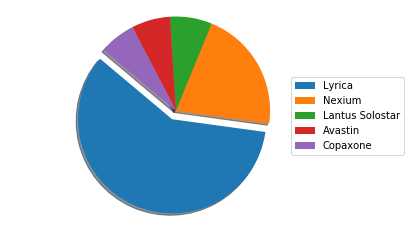

In [89]:
# Create pie chart of Top 5 Brands Sold to India based on number of drugs sold

brands = ['Lyrica','Nexium','Lantus Solostar','Avastin','Copaxone']
orders = [916, 326, 112, 103, 97]


#Create labels, and explosion
explode = (0.1,0,0,0,0)

plt.pie(orders, explode=explode,shadow=True, startangle=140)
plt.legend(loc='upper right', labels=brands, bbox_to_anchor=(1.2,0.7))
plt.axis('equal')


plt.savefig('./top_5_indiaorders_pie.png')
plt.show()

### Revenue dataframe & pie chart 

In [92]:
#Create dataframe focused on total revenue of each brand name sold in India
brand_orders_rev = india_sales_df.groupby('Brand Name').sum()['Revenue']
brand_orders_rev = pd.DataFrame(brand_orders_rev)
brand_orders_rev.sort_values(by=['Revenue'], inplace=True, ascending=False)
brand_orders_rev

,Revenue
Brand Name,
Lyrica,119402000
Nexium,29290980
Copaxone,11454949
Avastin,7087581
Lantus Solostar,6669663
"Rituxan, MabThera",5778136
Remicade,5035304
Cymbalta,4684926
Spiriva,2050650


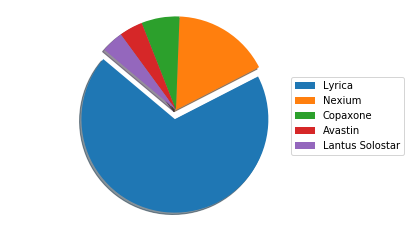

In [69]:
# Create pie chart of Top 5 Brands Sold to India based on revenue
brands = ['Lyrica','Nexium','Copaxone','Avastin','Lantus Solostar']
sales = [119402000, 29290980, 11454949, 7087581, 6669663]

#Create labels, and explosion
explode = (0.1,0,0,0,0)

plt.pie(sales, explode=explode,shadow=True, startangle=140)
plt.legend(loc='upper right', labels=brands, bbox_to_anchor=(1.2,0.7))
plt.axis('equal')


plt.savefig('./top_5_indiarev_pie.png')
plt.show()

## Monthly Sales to India

### Sorting months in order of calendar year and putting it in a dataframe and creating visualization of findings.

In [70]:
# Create a dataframe focused on monthly sales to India 

# Group dataset by months with revenue sum for each month for overall sales
monthly_sales = india_sales_df.groupby('Months').sum()['Revenue']

# Organized dataframe by calendar year
months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 
         'Sept', 'Oct', 'Nov', 'Dec']
revenue = [15969704, 13494332, 18697479, 17997111, 15516064, 15832297,
           16112221, 13771778, 14251547, 17261057, 17331888, 17104786]

# Show organized dataframe
monthly_sales_org = pd.DataFrame(revenue, months)
monthly_sales_org.columns = ['Revenue']
monthly_sales_org

,Revenue
Jan,15969704
Feb,13494332
Mar,18697479
April,17997111
May,15516064
June,15832297
July,16112221
Aug,13771778
Sept,14251547
Oct,17261057


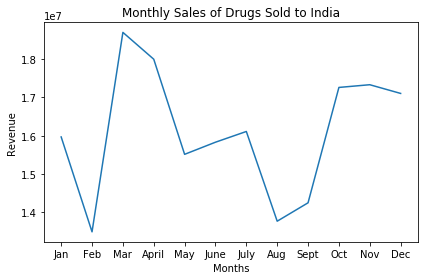

In [71]:
# Create a line chart based off of the group series from before

plt.plot(monthly_sales_org)
plt.title("Monthly Sales of Drugs Sold to India")
plt.xlabel("Months")
plt.ylabel("Revenue")

plt.tight_layout()
plt.savefig('./montly_sales_india.png')
plt.show()

## Comparisons of Pharmaceutical Sales to India Throughout the Year 

### Created dataframe that incudes the columns of interest in order to chart sales to India by drug.  

In [72]:
# Created dataframe with the columns Months, Brand Name, and Revenue
brand_rev = india_sales_df[['Months','Brand Name','Revenue']]
brand_rev = pd.DataFrame(brand_rev)
brand_rev

,Months,Brand Name,Revenue
10,Nov,Lyrica,23000
11,Sep,Lyrica,188000
12,Jul,Lyrica,67500
13,Jul,Lyrica,189500
14,Oct,Lyrica,52000
...,...,...,...
3316,Nov,Copaxone,49159
3322,Aug,"Rituxan, MabThera",14924
3323,Dec,Lantus Solostar,9702
3324,Aug,Nexium,118218


### Selected Lyrica since it is the top drug sold to the region 

In [73]:
# Filter for revenues made off of Lyrica in India
lyrica = brand_rev.loc[brand_rev["Brand Name"] == "Lyrica"]

# Group dataset by months with revenue sum for each month for Lyrica sales
lyrica_months_sum = lyrica.groupby('Months').sum()['Revenue']

# Organize dataframe by calendar year
lyr_months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 
              'Sept', 'Oct', 'Nov', 'Dec']
lyr_rev = [9590500,8488000,11496000,11879500,8832500,9842500,
           11539000,8257000,8783000,10985500,9795000,9913500]

# Show organized dataframe
lyrica_months_org = pd.DataFrame(lyr_rev, lyr_months)
lyrica_months_org.columns = ['Revenue']
lyrica_months_org

,Revenue
Jan,9590500
Feb,8488000
Mar,11496000
April,11879500
May,8832500
June,9842500
July,11539000
Aug,8257000
Sept,8783000
Oct,10985500


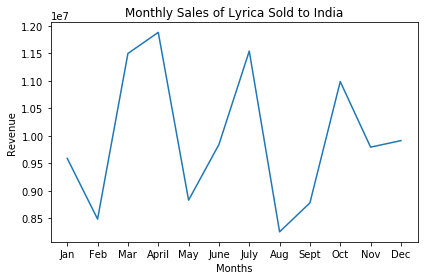

In [74]:
# Create chart on Lyrica sales throughout the year

plt.plot(lyrica_months_org)
plt.title("Monthly Sales of Lyrica Sold to India")
plt.xlabel("Months")
plt.ylabel("Revenue")

plt.tight_layout()
plt.savefig('./lyr_monthly_sales.png')
plt.show()

### Made a chart comparing Lyrica sales to overall sales throught 2015 

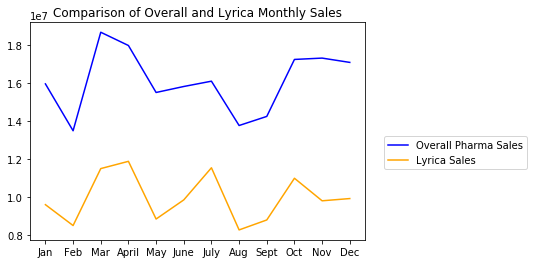

In [93]:
# Overall monthly sales and Lyrica sales line graph comparison

overall_sales = plt.plot(months, revenue, color='blue', label='Overall Pharma Sales')
lyr_sales = plt.plot(lyr_months, lyr_rev, color='orange', label='Lyrica Sales')

plt.title("Comparison of Overall and Lyrica Monthly Sales")
plt.legend(bbox_to_anchor=(1.5,0.5))
plt.savefig('./overall_and_lyr_compare.png')
plt.show()